Imports:

In [55]:
import os

import pandas as pd
import matplotlib.pyplot as plt

Class creating:

In [116]:
class DrawingPlots:

    def __init__(self,  path_to_file:str, plots_dir_name:str='plots'):
        try:
            self.df = pd.read_json(path_to_file)
        except:
            print('Error: Incorrect path!')
        try:
            self.plots_dir_name = plots_dir_name
            os.mkdir(plots_dir_name)
        except:
            pass
        
    def get_columns_names(self) -> list:
        return self.df.columns
    
    def hist(self, columns:list, plot_type:str, save_img:bool=True, img_type:str='jpg'):
        to_remove = []
        fig = plt.figure(figsize=(20,8))
        for column in columns:
            if column in self.df.select_dtypes('object'):
                print(f'Warning: "{column}" column type is object!')
                to_remove.append(column)
        for column in to_remove: columns.remove(column)

        if len(columns)==0:
            print('Error: incorrect columns!')
            return

        match plot_type:
            case 'Hist':
                plt.hist(self.df[columns])
            case 'Boxplot':
                plt.boxplot(self.df[columns])
        title = f'{plot_type} {columns}'
        plt.title(title)
        plt.legend(columns)
        if save_img:
            try:
                path_to_file = f'{self.plots_dir_name}/{title}.{img_type}'
                fig.savefig(path_to_file)
                return path_to_file
            except Exception as e:
                print('Saving error: ', e)

Make a class object with .json data path:

In [125]:
obj = DrawingPlots('data.json')
df_columns = obj.get_columns_names()
print('Columns: ', df_columns)

Columns:  Index(['name', 'gt_corners', 'rb_corners', 'mean', 'max', 'min', 'floor_mean',
       'floor_max', 'floor_min', 'ceiling_mean', 'ceiling_max', 'ceiling_min'],
      dtype='object')


Class functions testing:

Path to image file: plots/Hist ['mean', 'max', 'min'].webp


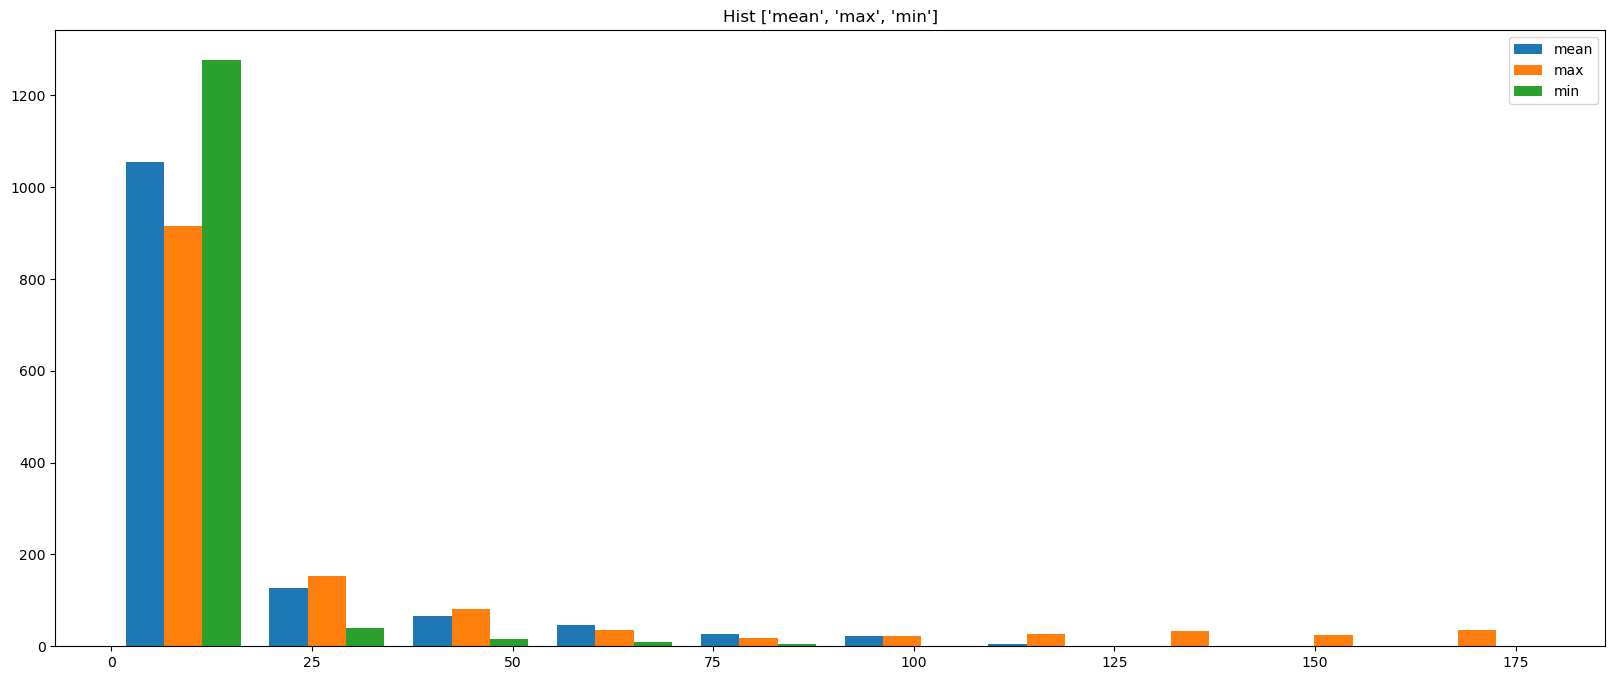

In [126]:
path_to_file = obj.hist(['name', 'mean', 'max', 'min'], 'Hist', img_type='webp')
print(f'Path to image file: {path_to_file}')

Enother test:

Path to image file: plots/Boxplot ['floor_max', 'floor_min', 'ceiling_mean', 'ceiling_max', 'ceiling_min'].jpg


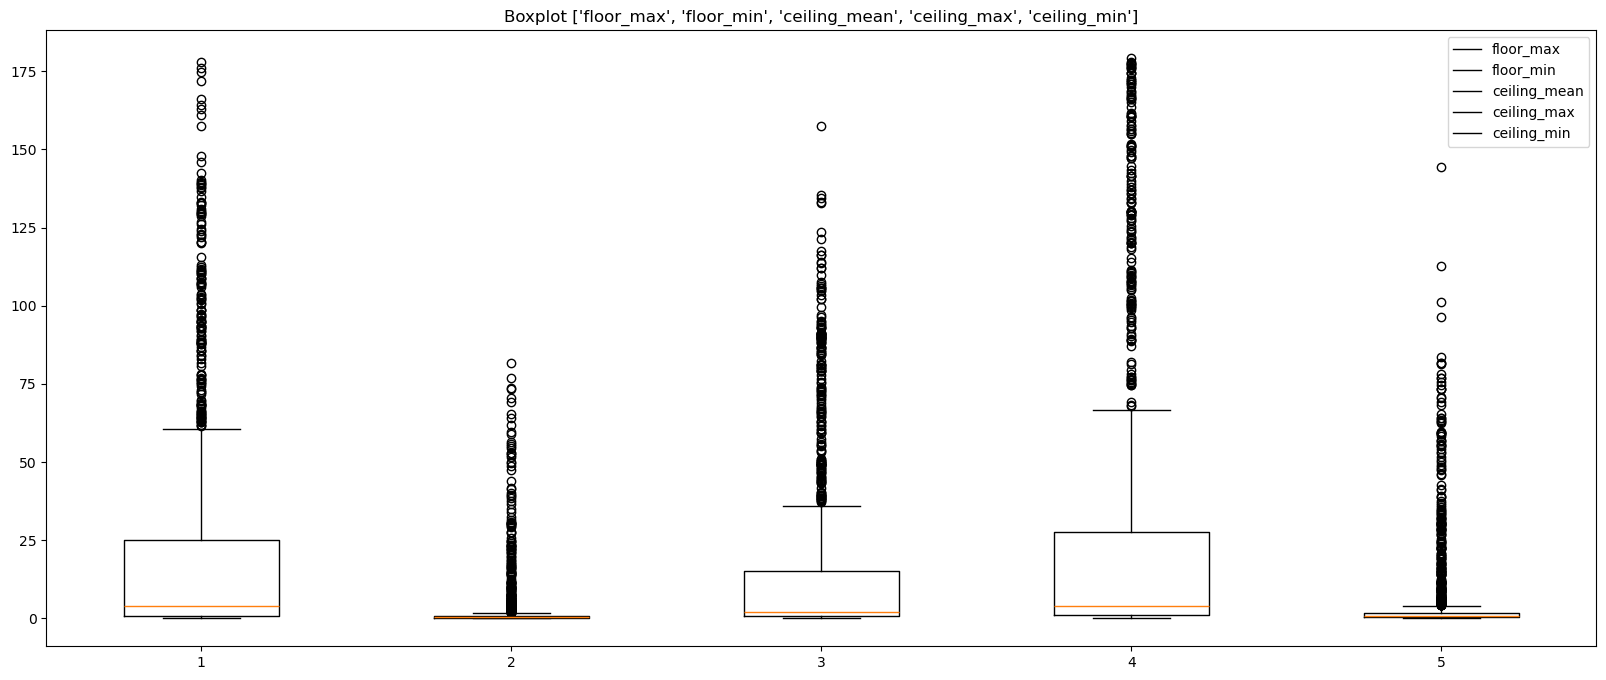

In [127]:
path_to_file = obj.hist(['floor_max', 'floor_min', 'ceiling_mean', 'ceiling_max', 'ceiling_min'], 'Boxplot')
print(f'Path to image file: {path_to_file}')

Argument error:

In [135]:
path_to_file = obj.hist(['name'], 'Boxplot')
print(f'Path to image file: {path_to_file}')

Error: incorrect columns!
Path to image file: None


<Figure size 2000x800 with 0 Axes>

Without saving:

Path to image file: None


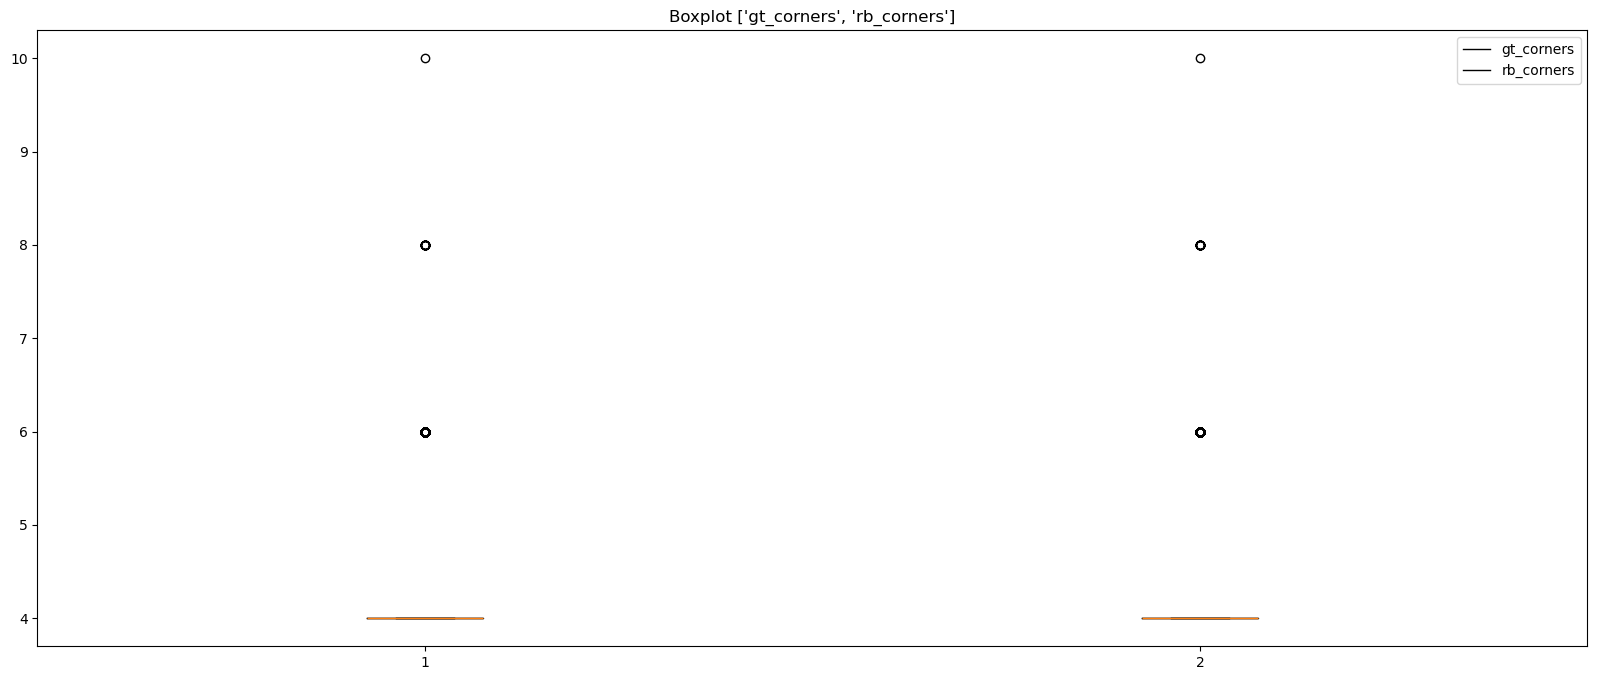

In [134]:
path_to_file = obj.hist(['gt_corners', 'rb_corners'], 'Boxplot', False)
print(f'Path to image file: {path_to_file}')

Saving in SVG:

Path to image file: plots/Boxplot ['mean'].svg


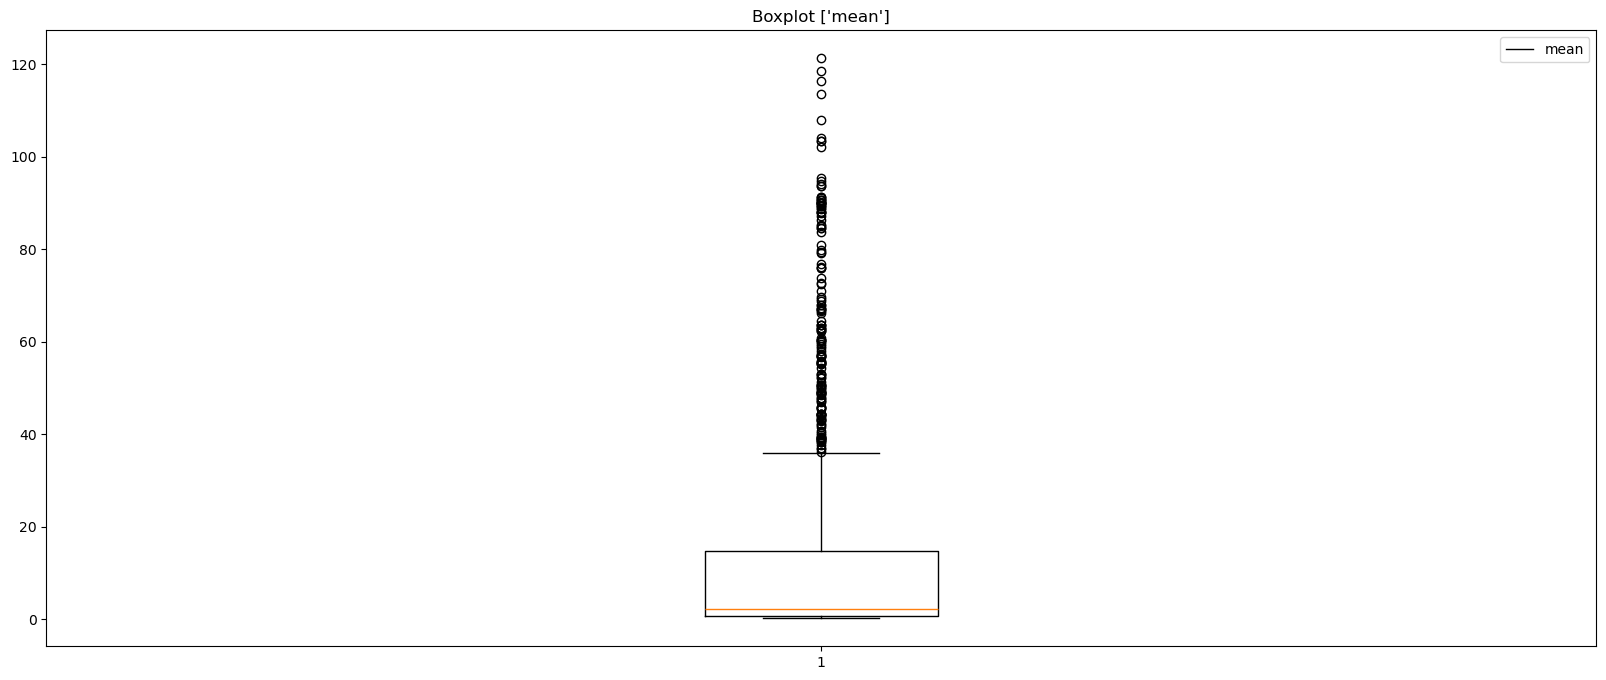

In [130]:
path_to_file = obj.hist(['mean'], 'Boxplot', img_type='svg')
print(f'Path to image file: {path_to_file}')

Saving type error:

Saving error:  Format 'json' is not supported (supported formats: eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff, webp)
Path to image file: None


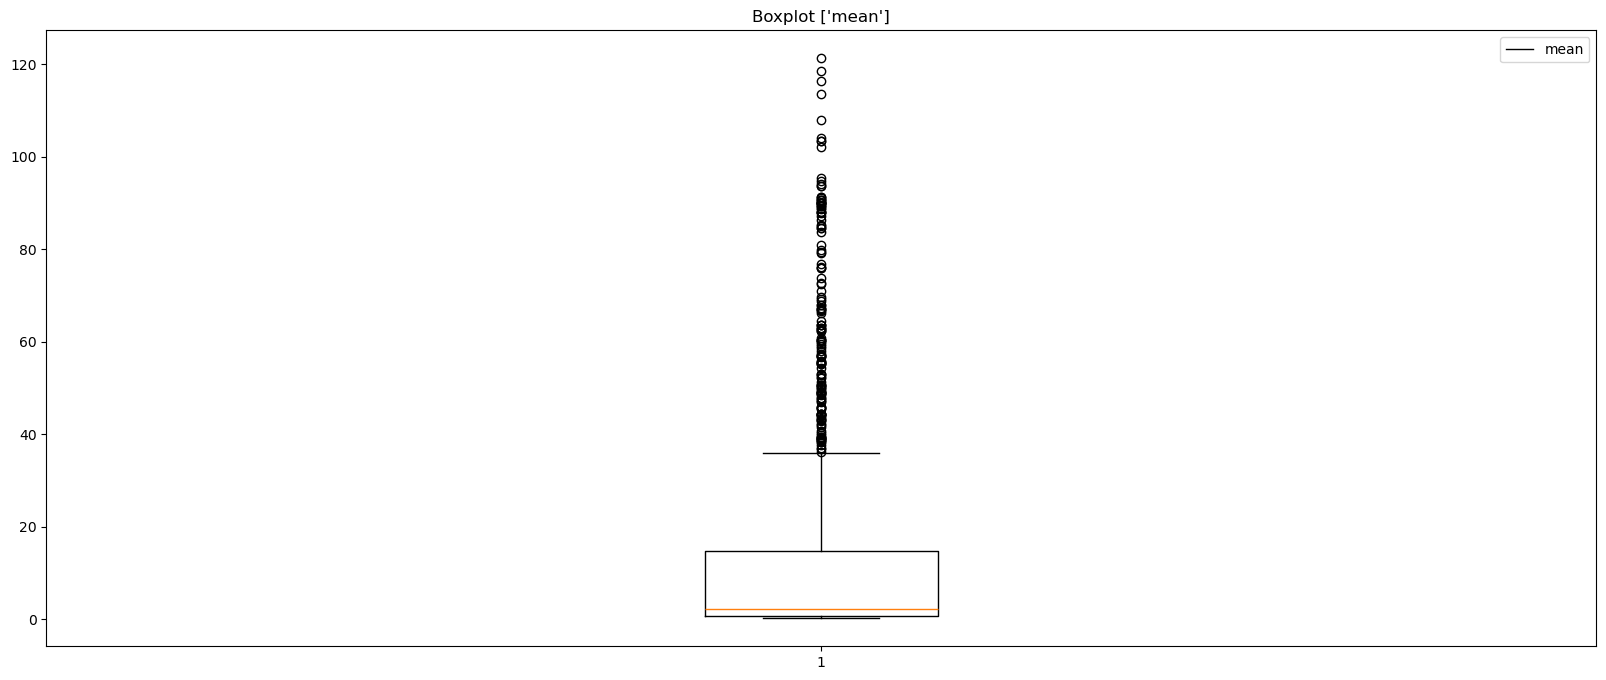

In [133]:
path_to_file = obj.hist(['mean'], 'Boxplot', img_type='json')
print(f'Path to image file: {path_to_file}')

Creating enother object with enother saving directoty:

In [132]:
obj1 = DrawingPlots('data.json', 'plots1')

Testing:

Path to image file: plots1/Hist ['mean', 'max', 'min'].webp


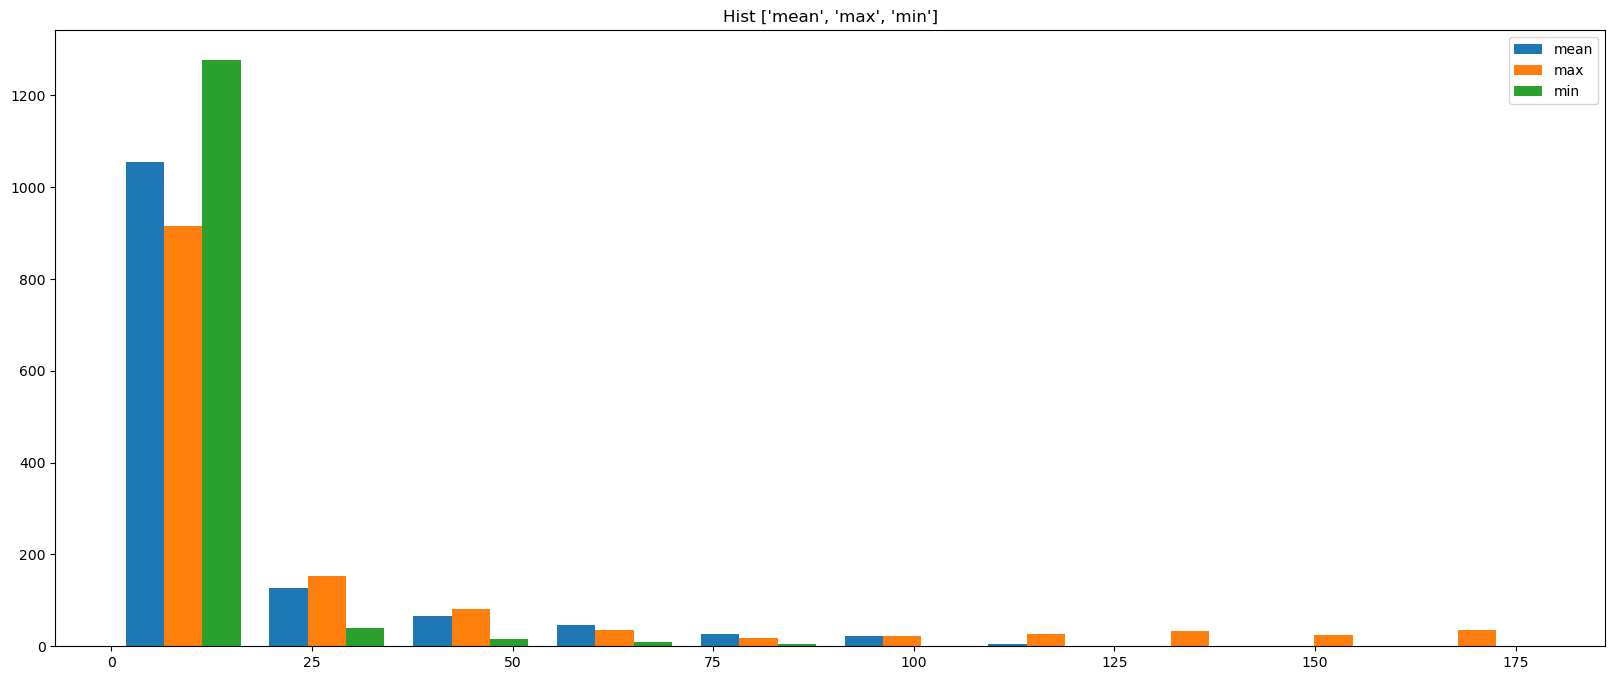

In [136]:
path_to_file = obj1.hist(['name', 'mean', 'max', 'min'], 'Hist', img_type='webp')
print(f'Path to image file: {path_to_file}')

The end.